# Parcial 1 - Karime Jiménez

1. Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes

In [2]:
import pandas as pd
import numpy as np

In [3]:
path = r"/S03_datasets/iris/iris.csv"
df = pd.read_csv(path)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns = ["PC1", "PC2", "PC3"])

pca_df.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


A. Indicar el porcentaje de la información utilizando los 3 componentes principales

In [7]:
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()*100
print(f"Varianza por c/componente: {explained_variance}")
print(f"Varianza total: {total_explained_variance}")

Varianza por c/componente: [0.72962445 0.22850762 0.03668922]
Varianza total: 99.48212908928453


B. Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'Proyección 3D de Iris Dataset')

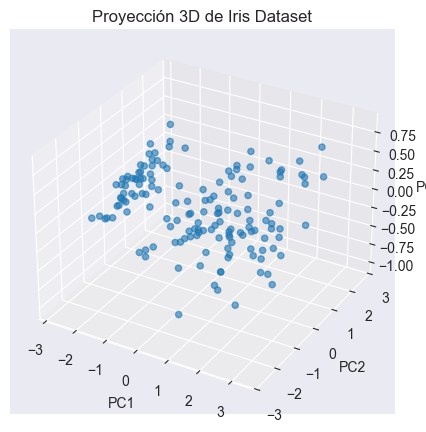

In [9]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], alpha=0.6)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Proyección 3D de Iris Dataset")

2. Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv

In [10]:
path = r"/S03_datasets/Brain_tumor/Brain Tumor.csv"
df = pd.read_csv(path)
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=["Image", "Class"])

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(x_pca, columns = ["PC1", "PC2"])
pca_df.head()

,PC1,PC2
0,1.134947,-0.116539
1,4.262143,0.049437
2,-2.481383,1.111446
3,-3.074085,0.235259
4,0.900927,-0.311275


A. ¿Qué notan de extraño con la columna "Corseness" al normalizar el dataset?

Valores muy pequeños, esto podría indicar errores numéricos o que los datos puedan estar mal escalados.
Al normalizar puede generar valores muy grandes e inestables y tener poco impacto en PCA.

B. Determinar el porcentaje de aporte de cada vector propio

In [14]:
explained_variance = pca.explained_variance_ratio_ * 100
explained_variance_df = pd.DataFrame({"Principal Component":["PC1", "PC2"], "Explained Variance (%)": explained_variance})
explained_variance_df

,Principal Component,Explained Variance (%)
0,PC1,40.881677
1,PC2,31.299148


C. Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos

In [15]:
pca = PCA(n_components=13)
pca.fit(x_scaled)
explained_variance = pca.explained_variance_ratio_.cumsum()
n_components = (explained_variance >=0.90).argmax()+1
print(f"Componentes necesarios: {n_components}")


Componentes necesarios: 4


D. Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados

In [16]:
# Método 1
df_pca1 = pca.transform(x_scaled)[:, :4]
print(f"Proyección de data: {df_pca1}")

Proyección de data: [[ 1.13494746 -0.11653928 -0.12207389 -0.30627248]
 [ 4.26214321  0.04943709  1.50070581  0.31306196]
 [-2.48138326  1.11144579 -0.95783349 -0.11793916]
 ...
 [-0.20359808  1.77566408  1.13305801  0.33898934]
 [-0.27314507  0.65503372  1.59330341 -0.42131414]
 [ 0.30895902 -1.21326935  1.32536124 -1.09447973]]


In [17]:
# Método 2
pca_reduced = PCA(n_components=4)
df_pca2 = pca_reduced.fit_transform(x_scaled)
print(f"Proyección de data: {df_pca2}")

Proyección de data: [[ 1.13494746 -0.11653928 -0.12207389 -0.30627248]
 [ 4.26214321  0.04943709  1.50070581  0.31306196]
 [-2.48138326  1.11144579 -0.95783349 -0.11793916]
 ...
 [-0.20359808  1.77566408  1.13305801  0.33898934]
 [-0.27314507  0.65503372  1.59330341 -0.42131414]
 [ 0.30895902 -1.21326935  1.32536124 -1.09447973]]


E. Hacer la comparación de los pairplot con la data original y la data proyectada

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_scaled)
df_pca = pd.DataFrame(df_pca, columns=["PC1","PC2"])

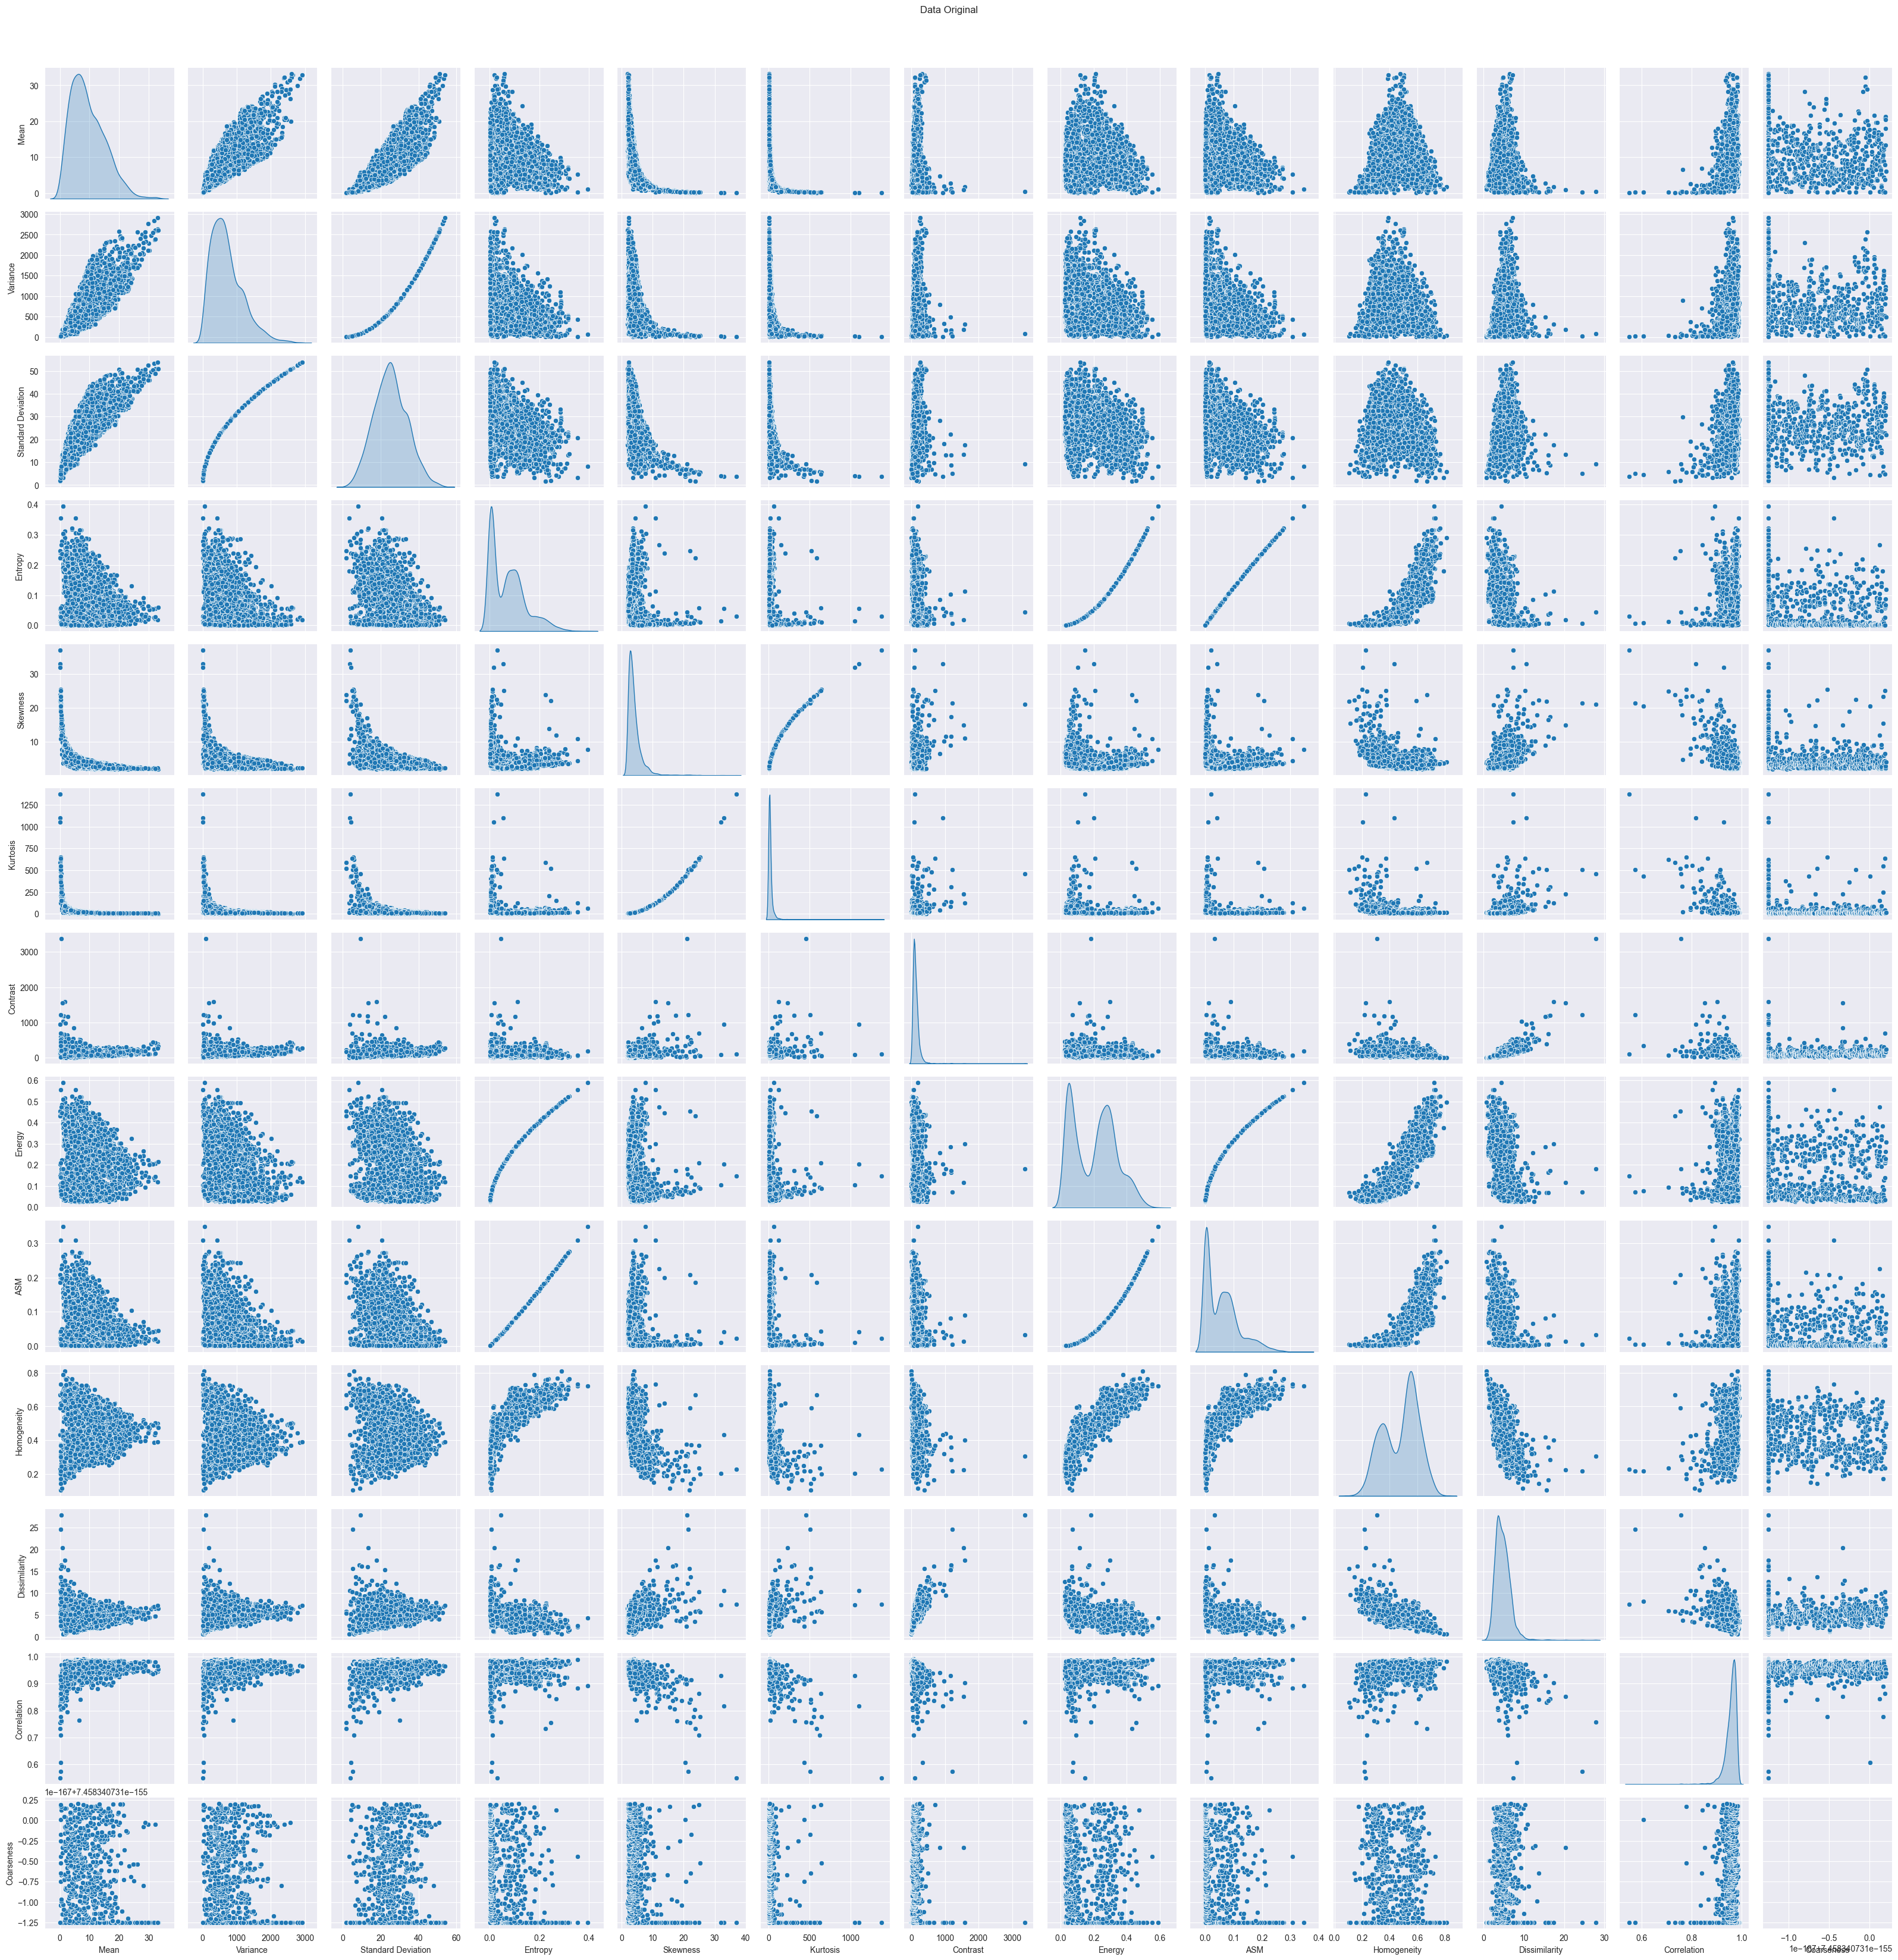

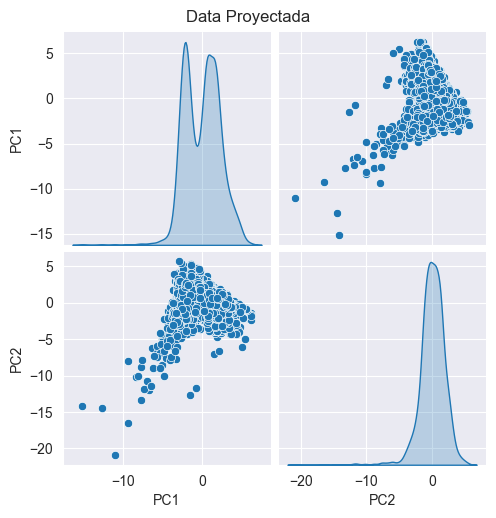

In [20]:
# Data original
sns.pairplot(x, diag_kind="kde")
plt.suptitle("Data Original", y=1.02)
plt.show()

# Data proyectada
sns.pairplot(df_pca, diag_kind="kde")
plt.suptitle("Data Proyectada", y=1.02)
plt.show()
